In [1]:
# Standard Headers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns

# Enable inline mode for matplotlib so that Jupyter displays graphs
%matplotlib inline

In [2]:
# Load dataset, since we are only interested in success (Graduate) or fail (Dropout), we remove enrolled from 'Target'
df = pd.read_csv("dataset.csv")
df = df.drop(df[(df["Target"] == 'Enrolled')].index)
df['Target'] = df['Target'].map({'Dropout':0, 'Graduate':1})
df.head(10)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1
5,2,12,1,17,0,12,1,22,27,10,...,0,5,17,5,11.500000,5,16.2,0.3,-0.92,1
6,1,1,1,12,1,1,1,13,28,8,...,0,8,8,8,14.345000,0,15.5,2.8,-4.06,1
7,1,9,4,11,1,1,1,22,27,10,...,0,5,5,0,0.000000,0,15.5,2.8,-4.06,0
8,1,1,3,10,1,1,15,1,1,10,...,0,6,7,6,14.142857,0,16.2,0.3,-0.92,1
9,1,1,1,10,1,1,1,1,14,5,...,0,6,14,2,13.500000,0,8.9,1.4,3.51,0


In [3]:
df.dtypes

Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance                          int64
Previous qualification                              int64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender                                              int64
Scholarship holder                                  int64
Age at enrollm

<AxesSubplot:>

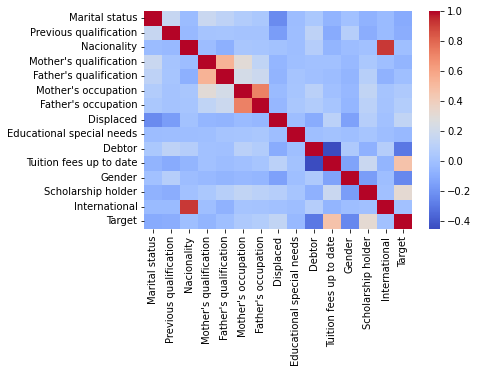

In [4]:
# We first try observing the correlations between socio-economic features in our dataset
df = df.sample(n=2000, random_state=1)

social_df = df[["Marital status","Previous qualification","Nacionality", "Mother's qualification",
       "Father's qualification", "Mother's occupation", "Father's occupation", "Displaced",
       "Educational special needs", "Debtor", "Tuition fees up to date", "Gender", "Scholarship holder",
       "International","Target"]]

correlations_social = social_df.corr()
sns.heatmap(correlations_social, annot=False, cmap="coolwarm")

In [5]:
# For our first Logistic Regression model, we will continue to use socio-economic features
X = df[["Marital status","Previous qualification","Nacionality", "Mother's qualification",
       "Father's qualification", "Mother's occupation", "Father's occupation", "Displaced",
       "Educational special needs", "Debtor", "Tuition fees up to date", "Gender", "Scholarship holder",
       "International"]]
y = df["Target"]

In [6]:
# Split the data into train/test, scale the data
import sklearn.model_selection as skl
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = skl.train_test_split(X, y, test_size=0.2, random_state=1)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train)

[[-0.29130584 -0.39220749 -0.14529757 ... -0.73985727 -0.6139514
  -0.16012815]
 [-0.29130584 -0.39220749 -0.14529757 ... -0.73985727 -0.6139514
  -0.16012815]
 [-0.29130584 -0.39220749 -0.14529757 ... -0.73985727 -0.6139514
  -0.16012815]
 ...
 [-0.29130584  2.87749826 -0.14529757 ...  1.35161205  1.62879343
  -0.16012815]
 [-0.29130584  0.11082416 -0.14529757 ... -0.73985727 -0.6139514
  -0.16012815]
 [-0.29130584  2.37446661 -0.14529757 ... -0.73985727 -0.6139514
  -0.16012815]]


In [7]:
# Create and fit our first logistic regression model with only socio-economic features.
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression( fit_intercept=True)

# Fit the model to your training data.
model.fit(X_train,y_train)

LogisticRegression()

In [8]:
# Compute the accuracy of our model on the testing set.
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.7725

In [9]:
from sklearn.metrics import classification_report
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.75      0.61      0.67       152
           1       0.78      0.88      0.83       248

    accuracy                           0.77       400
   macro avg       0.77      0.74      0.75       400
weighted avg       0.77      0.77      0.77       400



<AxesSubplot:>

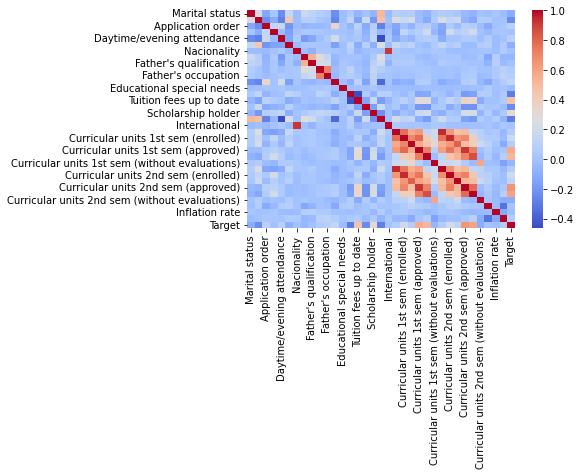

In [10]:
# To improve the accuracy, we take into consider the other features regarding academic credits.
# From the correlation heatmap with these added features, we observe high positive correlations with our target.
correlations_df = df.corr()
correlations_df
sns.heatmap(correlations_df, annot=False, cmap="coolwarm")

<AxesSubplot:>

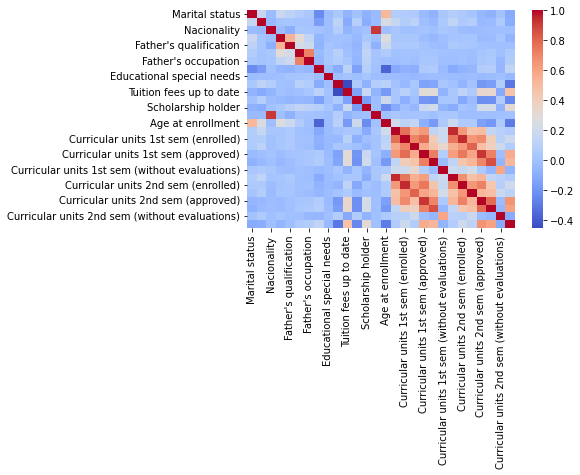

In [11]:
# So we begin training another model with both socio-economic features and curricular state.
df_copy = df.copy()
df_copy = df_copy[["Marital status","Previous qualification","Nacionality", "Mother's qualification",
       "Father's qualification", "Mother's occupation", "Father's occupation", "Displaced",
       "Educational special needs", "Debtor", "Tuition fees up to date", "Gender", "Scholarship holder",
       "International", "Age at enrollment","Curricular units 1st sem (credited)","Curricular units 1st sem (enrolled)",
"Curricular units 1st sem (evaluations)","Curricular units 1st sem (approved)","Curricular units 1st sem (grade)","Curricular units 1st sem (without evaluations)"
,"Curricular units 2nd sem (credited)","Curricular units 2nd sem (enrolled)","Curricular units 2nd sem (evaluations)"           
,"Curricular units 2nd sem (approved)","Curricular units 2nd sem (grade)","Curricular units 2nd sem (without evaluations)","Target" ]]
df_copy.head()
except_social_corr = df_copy.corr()
sns.heatmap(except_social_corr, annot=False, cmap="coolwarm")

In [12]:
# Once again build our training and testing sets
y = df_copy["Target"]
X = df_copy.drop(columns=['Target'])
X_train, X_test, y_train, y_test = skl.train_test_split(X, y, test_size=0.2, random_state=1)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train)

[[-0.29130584 -0.39220749 -0.14529757 ... -0.17432464  0.78470692
   2.35577825]
 [-0.29130584 -0.39220749 -0.14529757 ... -0.17432464  0.26907828
  -0.17902014]
 [-0.29130584 -0.39220749 -0.14529757 ...  0.44895899  0.36007157
  -0.17902014]
 ...
 [-0.29130584  2.87749826 -0.14529757 ...  0.44895899  0.48139596
  -0.17902014]
 [-0.29130584  0.11082416 -0.14529757 ...  0.7606008   0.79943917
  -0.17902014]
 [-0.29130584  2.37446661 -0.14529757 ... -1.4208919  -1.82376736
  -0.17902014]]


In [13]:
# Compute the accuracy of our new model on our new testing set.
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.925

In [14]:
report = classification_report(y_test,y_pred)
print(report)

# Note we see significant improvement across recall, precision, f1-score and accuracy after
# including academic credits. The number of academic credits enrolled and approved 
# are a strong factor in our models ability to classify 'Graduate' or 'Dropout'

              precision    recall  f1-score   support

           0       0.93      0.87      0.90       152
           1       0.92      0.96      0.94       248

    accuracy                           0.93       400
   macro avg       0.93      0.91      0.92       400
weighted avg       0.93      0.93      0.92       400

